In [155]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read and store my database from openipf .csv
df = pd.read_csv(r'C:\Users\rbenoist\Desktop\Python-main\Code\Analyse IPF python\IPF\IPF-analysis\openipf-2022-11-26-25c7d08e.csv')

c:\Users\rbenoist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [122]:
# get the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131003 entries, 0 to 1131002
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1131003 non-null  object 
 1   Sex               1131003 non-null  object 
 2   Event             1131003 non-null  object 
 3   Equipment         1131003 non-null  object 
 4   Age               817015 non-null   float64
 5   AgeClass          855285 non-null   object 
 6   BirthYearClass    867737 non-null   object 
 7   Division          1130058 non-null  object 
 8   BodyweightKg      1117700 non-null  float64
 9   WeightClassKg     1119513 non-null  object 
 10  Squat1Kg          421363 non-null   float64
 11  Squat2Kg          416966 non-null   float64
 12  Squat3Kg          406089 non-null   float64
 13  Squat4Kg          326 non-null      float64
 14  Best3SquatKg      809273 non-null   float64
 15  Bench1Kg          608959 non-null   float64
 16  

In [162]:
# have a view of the dataframe

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
1,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,Open,50.64,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
2,Renee Orbon,F,SBD,Single-ply,31.5,24-34,24-39,Open,55.76,56,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
3,Rikki Flanders,F,SBD,Single-ply,31.5,24-34,24-39,Open,56.42,60,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4,Julie Hallmond,F,SBD,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships


In [124]:
# User parameters

# How many athletes do we want to study ?
n_athlete = 10

# Choose mode "national" or "international"; national mode is related to the "country" value
mode = "national"

# Choose the athlete's sex "M" or "F"
sex = "F" 

# Choose athlete equipment "Raw" or "Single-ply"
equipment = "Raw"

# Choose athlete event "SBD" or "B"
event = "SBD"

# Choose athlete country related to national mode
country = "France"

# Store the different federations
federation_1 = "FFForce"
federation_2 = "IPF"
federation_3 = "EPF"
forbidden_division = "Prime Time"

# Choose the limit date of the data
end_date = "2023-01-01"

In [145]:
# Creating a dictionary
d = {}

# Fix parameters
if sex == "F":
    list = ['47', '52', '57', '63', '69', '76', '84', '84+']
else:
    list = ['59', '66', '74', '83', '93', '105', '120', '120+']


for categories in list:
    if mode == "national" :
        d[categories] = pd.DataFrame(
            df.loc[
            (df['Sex'] == sex)
            & 
            (df['WeightClassKg'] == categories)
            & 
            (df['Equipment'] == equipment)
            & 
            (df['Event'] == event)
            &
            (
                (df['Federation'] == federation_1)
                |
                (df['Federation'] == federation_2) & (df['Country'] == country)
                |
                (df['Federation'] == federation_3) & (df['Country'] == country)
            )
            &
            (df['Division'] != forbidden_division)
            &
            (df['Date'] < end_date)
            ]
        )
    else :
        d[categories] = pd.DataFrame(
            df.loc[
            (df['Sex'] == sex)
            & 
            (df['WeightClassKg'] == categories)
            & 
            (df['Equipment'] == equipment)
            & 
            (df['Event'] == event)
            &
            (
                (df['Federation'] == federation_2)
                |
                (df['Federation'] == federation_3)
            )
            &
            (df['Division'] != forbidden_division)
            &
            (df['Date'] < end_date)
            ]
        )

In [146]:
# Group by my table to take the max Goodlift per Athlete Name
for categories in list:
    d[categories] = pd.DataFrame(d[categories].groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False))
    d[categories] = pd.DataFrame(d[categories].head(n_athlete))

In [157]:
# Store my result in an excel file
with pd.ExcelWriter(r"C:\Users\rbenoist\Desktop\Python-main\Code\Analyse IPF python\IPF\IPF-analysis\results.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    for categories in list:
        d[categories].to_excel(writer, header=categories, sheet_name=categories)

([<matplotlib.axis.XTick at 0x243e94b0d90>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

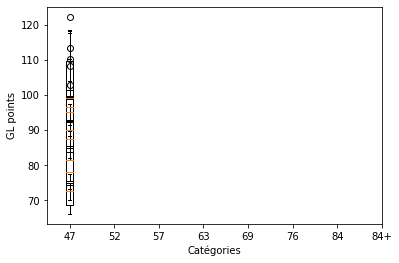

In [169]:
# Name my categories depending on "Sex" value
if sex == "F" :
    bars = ('47', '52', '57', '63', '69', '76', '84', '84+')
else :
    bars = ('59', '66', '74', '83', '93', '105', '120', '120+')

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True



for categories in list:
    plt.boxplot(
        [  
        d[categories]['Goodlift']
        ]   
    )

# Name my labels
plt.ylabel('GL points')
plt.xlabel('Catégories')

# Adjust y axis
# plt.ylim([90, 140])

# Name my xticks according to my "bars" value
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

In [ ]:

# Plot a boxplot with top n-athlete per category
plt.boxplot(
    [  
    d['47']['Goodlift'],
    d['52']['Goodlift'],
    d['57']['Goodlift'],
    ]
)

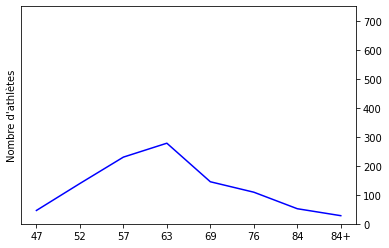

In [138]:
# Display number of athletes per categories
n_cate = np.array([46, 139, 230, 278, 145, 109, 52, 28])

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

plt.ylim([0, 750])
plt.ylabel("Nombre d'athlètes")
t = plt.ylabel("Nombre d'athlètes");
plt.plot(bars, n_cate, color = 'blue')

([<matplotlib.axis.XTick at 0x243e6176e20>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

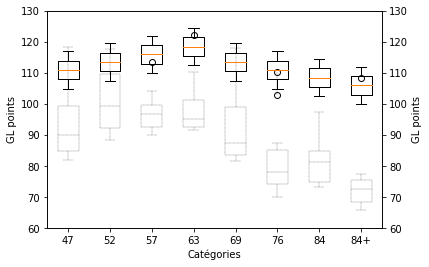

In [139]:
# Display 2 boxplots on same graph
plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ], 
    boxprops= dict(linestyle='--',linewidth=0.25, color='black'),
    whiskerprops=dict(linestyle='--',linewidth=0.25, color='black'),
    medianprops = dict(linestyle='--', linewidth=0.25, color='black'),
    capprops = dict(linestyle='--', linewidth=0.25, color='black'),
    flierprops = dict(linestyle='--', linewidth=0.25, color='black')
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)


# both boxplot
plt.twinx()
a = np.arange(105, 117.5, 1).tolist()
b = np.arange(107.5, 120, 1).tolist()
c = np.arange(110, 122.5, 1).tolist()
d = np.arange(112.5, 125, 1).tolist()
e = np.arange(107.5, 120, 1).tolist()
f = np.arange(105, 117.5, 1).tolist()
g = np.arange(102.5, 115, 1).tolist()
h = np.arange(100, 112.5, 1).tolist()
plt.boxplot(
    [
    a,
    b,
    c,
    d,
    e,
    f,
    g,
    h
    ], widths = 0.5
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

{'whiskers': [<matplotlib.lines.Line2D at 0x243e62e8730>,
 'caps': [<matplotlib.lines.Line2D at 0x243e62e8e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x243e62dd2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x243e62f65b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x243e62f6940>],
 'means': []}

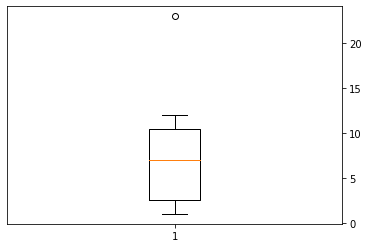

In [140]:
# display a typical boxplot in order to describe it on my presentation

plt.boxplot([1,2,3,7,9,12,23])